# Inspection of a NEP model

A NEP model contains a large number of parameters and hyperparameters.
`calorine` provides functionality to parse and analyze these parameters.
This is useful for obtaining insight into the model, for example, into the impact of hyperparameters but also the finer details of the descriptors and model parameters.
It even consciously allows one to modify models, for example, by pruning parameters or descriptor components.

All models and structures required for running this and the other tutorial notebooks can be obtained from [Zenodo](https://zenodo.org/record/10658778).
The files are also available in the `tutorials/` folder in the [GitLab repository](https://gitlab.com/materials-modeling/calorine/-/tree/master/tutorials).

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from glob import glob
import numpy as np
from ase.io import read
from calorine.calculators import CPUNEP
from calorine.nep import read_model
from matplotlib import pyplot as plt
from numpy.polynomial.chebyshev import chebval
from pandas import DataFrame

## Parsing a model file and basic inspection

A model file (`nep.txt`) can be simply loaded using the `read_model` function, which returns a `Model` object that provides the content of the `nep.txt` in a structured format.
For the following demonstration, we use a NEP3 model for CsPbI<sub>3</sub>.
You can find more information about this model in [this paper](http://doi.org/10.1021/acs.jpcc.3c01542).
The model can be obtained by following [this link](https://zenodo.org/records/8014365/files/nep-CsPbI3-SCAN.txt), with supplementary information and other models being available [here](https://materialsmodeling.org/models-nep/).

In [3]:
model_fname = 'nep-CsPbI3-SCAN.txt'
model = read_model(model_fname)

The `model` object behaves similar to a dict safe for some additional functionality.
It contains the basic hyperparameters of the model such as the radial and angular cutoff radii, the specifications pertaining to the basis functions for the corresponding descriptors as well as several derived quantities.
A summary of its content can be obtained by using `print` or `display` (in notebooks).

In [4]:
display(model)

Model(version=3, model_type='potential', types=('Cs', 'Pb', 'I'), radial_cutoff=8.0, angular_cutoff=4.0, n_basis_radial=8, n_basis_angular=8, n_max_radial=8, n_max_angular=6, l_max_3b=4, l_max_4b=0, l_max_5b=0, n_descriptor_radial=9, n_descriptor_angular=28, n_neuron=50, n_parameters=3284, n_descriptor_parameters=1296, n_ann_parameters=1951, ann_parameters={'all_species': {'w0': array([[ 1.5732225e+00,  3.5745609e-01, -1.4026275e-01, ...,
        -3.0616167e-04,  1.7256318e-05,  5.0790510e-05],
       [-1.6603614e+00,  7.9209246e-02, -6.4269030e-01, ...,
         7.9236401e-05,  1.5951614e-01, -2.0142978e-02],
       [ 1.0717462e+00,  2.4097002e+00, -2.5296204e+00, ...,
        -1.0890052e-04,  3.0149251e-01, -9.8895895e-01],
       ...,
       [-4.3990737e-01,  6.4712822e-01,  2.3537090e-02, ...,
         8.0288790e-02,  3.1163096e-01,  7.7535188e-01],
       [ 5.3347269e-04, -3.4779776e-05, -5.3631975e-06, ...,
         3.7913815e-05,  3.5905654e-05,  5.0306910e-05],
       [ 3.8606298e-04,  3.6190097e-05, -8.8646175e-06, ...,
         6.3238986e-05,  6.0796803e-05,  1.2010767e-05]]), 'b0': array([[ 4.0357009e-01],
       [-8.4748572e-01],
       [-2.1266138e-02],
       [-1.8018994e-01],
       [ 9.6151590e-01],
       [ 3.3369160e-01],
       [ 2.7541791e-05],
       [-8.0066687e-01],
       [-1.4344646e+00],
       [-3.9444464e-01],
       [-1.8312737e-04],
       [ 4.9084194e-02],
       [ 1.3970016e+00],
       [ 9.7140786e-05],
       [ 3.6165568e-01],
       [ 4.5132190e-05],
       [-1.5694810e+00],
       [-3.0106962e-02],
       [-3.5194793e-01],
       [-5.6660708e-02],
       [-1.6556090e+00],
       [-3.9561206e-01],
       [-1.7397707e+00],
       [-2.5776095e-05],
       [-4.1507593e-01],
       [-5.5594039e-03],
       [-2.9595728e+00],
       [ 5.0427216e-01],
       [ 4.3445303e-05],
       [-7.9742354e-01],
       [-9.4576040e-05],
       [ 6.3180184e-01],
       [-6.4707069e-06],
       [-1.5588896e-05],
       [ 1.6401366e-04],
       [ 9.4677613e-05],
       [-1.3040465e+00],
       [ 6.4964157e-01],
       [ 4.9736986e-01],
       [-3.1359068e-05],
       [-1.8150178e-05],
       [-7.7640660e-02],
       [-2.4747655e+00],
       [ 1.9796335e-03],
       [-5.6581641e-05],
       [ 2.2716792e-02],
       [-5.4824734e-01],
       [ 1.5302507e+00],
       [ 5.5625234e-05],
       [ 1.1542797e-04]]), 'w1': array([[ 4.5808578e-01,  8.6733007e-01,  3.5918242e-01,  1.1297338e-01,
         4.5319590e-01,  4.2310137e-01,  9.7440156e-05,  4.0000400e-01,
         3.3655626e-01, -3.5959950e-01,  4.5043606e-02,  4.9647465e-01,
        -2.1005406e-03,  1.0158002e-05,  2.2053545e+00, -5.9618727e-05,
        -1.7090744e-01,  6.1900222e-01,  3.9464414e-01, -4.2024657e-01,
         1.1661358e+00, -3.1574443e-01, -3.3876404e-01, -1.1027536e-04,
        -4.2343840e-01,  1.9019254e-01, -6.7328221e-01,  3.7928951e-01,
        -2.9203580e-05, -3.6773520e+00, -2.4932386e-05, -3.4901151e-01,
        -2.6877997e-02, -9.4214731e-05, -1.2577628e-01, -1.1434610e-04,
        -7.7746326e-01,  5.3289187e-01,  8.2734799e-01,  2.9337678e-05,
        -1.0704128e-01,  1.6726325e-01, -8.8893229e-01, -2.0586051e-01,
         1.1442095e-04, -1.7291763e-01, -7.3390132e-01,  1.2541076e+00,
        -1.9429119e-05, -7.6855406e-02]])}, 'b1': 37.051445}, q_scaler=[0.026244445, 0.026244445, 0.026244445, 0.026244445, 0.026244445, 0.026244445, 0.026244445, 0.026244445, 0.026244445, 1.2631857, 1.2631857, 1.2631857, 1.2631857, 1.2631857, 1.2631857, 1.2631857, 0.29592264, 0.29592264, 0.29592264, 0.29592264, 0.29592264, 0.29592264, 0.29592264, 0.3085967, 0.3085967, 0.3085967, 0.3085967, 0.3085967, 0.3085967, 0.3085967, 0.050496344, 0.050496344, 0.050496344, 0.050496344, 0.050496344, 0.050496344, 0.050496344], radial_descriptor_weights={('Cs', 'Cs'): array([[-0.10006142, -0.1000291 ,  0.10009218, -0.10060749, -0.10003235,
        -0.10006418, -0.10009778,  0.1002821 , -0.10003255],
       [-0.10000055, -0.10002837, -0.10000695, -0.10012656,  0.10000242,
 

We can thus see immediately, for example, that this model is aware of three species (Cs, Pb, and I) and uses radial and angular cutoffs of 8 and 4 Å, respectively.
The descriptor contains 9 radial and 28 angular components, and thus has a dimension of 37.
The model contains 3284 parameters, which includes 1951 weights in the neural network, 1296 weights in the descriptor, and 37 parameters in the scaler.
Note that only the neural network and descriptor weights are fit parameters.
The 37 parameters of the scaler (which has the same dimension as the descriptor) are set by the standardization of the input data.

The radial descriptor weights have a dimension of $9\times9$ for each pair of species, which corresponds to $(n_\text{max}^\text{R}+1) \times (n_\text{basis}^\text{R}+1)$.
Similarly the angular descriptor weights have a dimension of $7\times9$, corresponding to $(n_\text{max}^\text{A}+1) \times (n_\text{basis}^\text{A}+1)$.
Below we will show how these weights can be used to generate a visualiation of the basis functions.

## Analysis of the descriptors



### Radial descriptors

The individual fields can be accessed directly, which we can use, for example, for plotting the distribution of the weights of the descriptors.
The respective fields (`descriptor_weights_radial` and `descriptor_weights_angular`) are dictionaries, where the key is a tuple containing the two species for which the weights apply.
For example, we can access the weights for the Pb-I radial descriptors via ``potential.radial_descriptor_weights[('Pb', 'I')]``.

This allows us to readily plot the weights for the different combinations of species.

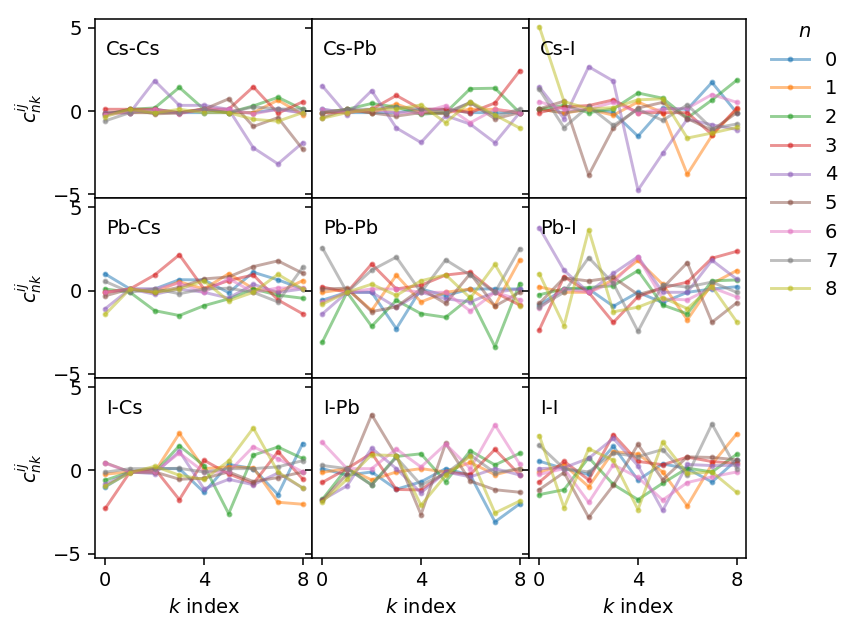

In [5]:
types = model.types

fig, axes = plt.subplots(figsize=(6, 5), nrows=len(types), ncols=len(types),
                         sharex=True, sharey=True, dpi=140)

for (s1, s2), data in model.radial_descriptor_weights.items():
    irow, icol = types.index(s1), types.index(s2)
    ax = axes[irow][icol]

    for n, c_nk in enumerate(data):
        kwargs = dict(markersize=2, marker='o', alpha=0.5, label=f'{n}')
        ax.plot(c_nk, **kwargs)

    ax.set_xticks([0, 4, 8])
    if irow == len(axes) - 1:
        ax.set_xlabel('$k$ index')
    if icol == 0:
        ax.set_ylabel('$c^{ij}_{nk}$')
    ax.text(0.05, 0.8, f'{s1}-{s2}', transform=ax.transAxes)

axes[0][-1].legend(title='$n$', loc='upper right',
                   bbox_to_anchor=(1.5, 1.08), frameon=False)

plt.subplots_adjust(hspace=0.0, wspace=0.0)
fig.align_labels()

Using these weights we can also visualize the actual basis functions for the descriptor, which are obtained by adding Chebyshev polynomials. 

In [6]:
def cutoff_func(rs, rcut):
    fc = 0.5 * (1 + np.cos(np.pi * rs / rcut))
    fc[rs > rcut] = 0
    return fc

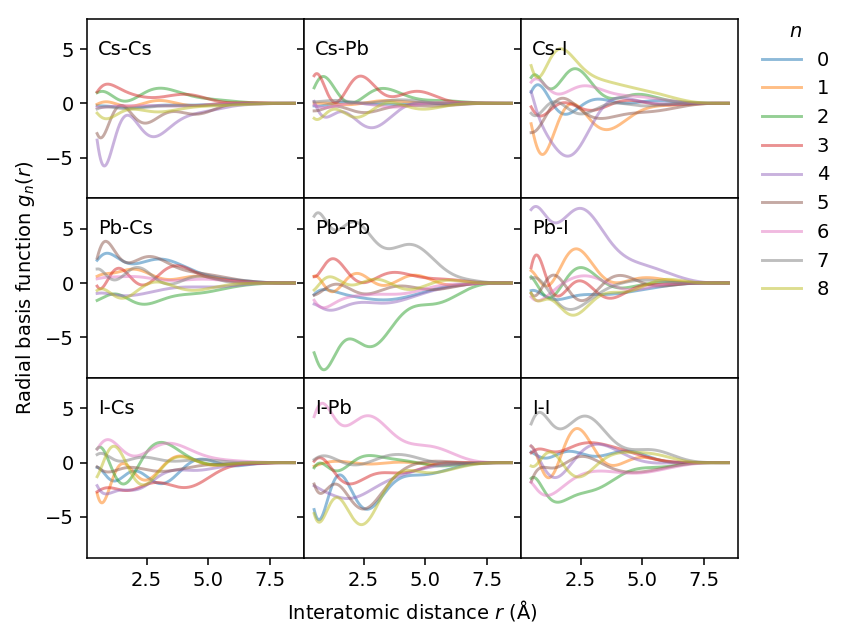

In [7]:
types = model.types
rs = np.arange(0.5, model.radial_cutoff + 0.5, 0.01)
xs = 2 * (rs / model.radial_cutoff - 1) ** 2 - 1

fig, axes = plt.subplots(figsize=(6, 5), nrows=len(types), ncols=len(types),
                         sharex=True, sharey=True, dpi=140)

for (s1, s2), data in model.radial_descriptor_weights.items():
    irow, icol = types.index(s1), types.index(s2)
    ax = axes[irow][icol]

    for n, c_nk in enumerate(data):
        g_n = np.zeros(len(rs))
        for k in range(len(c_nk)):
            coeff = np.zeros((k + 1))
            coeff[-1] = 1
            f_k = 0.5 * (chebval(xs, coeff) + 1) * cutoff_func(rs, model.radial_cutoff)
            g_n += c_nk[k] * f_k
        kwargs = dict(alpha=0.5, label=n)
        ax.plot(rs, g_n, **kwargs)

    if irow == len(axes) - 1 and icol == 1:
        ax.set_xlabel('Interatomic distance $r$ (Å)')
    if irow == 1 and icol == 0:
        ax.set_ylabel('Radial basis function $g_n(r)$')
    ax.text(0.05, 0.8, f'{s1}-{s2}', transform=ax.transAxes)

axes[0][-1].legend(title='$n$', loc='upper right',
                   bbox_to_anchor=(1.5, 1.08), frameon=False)

plt.subplots_adjust(hspace=0.0, wspace=0.0)
fig.align_labels()

### Angular descriptors

The analysis for the angular descriptor components is analoguous.
Here, however, the results show that angular terms are only substantial for some combinations, in particular I-I.

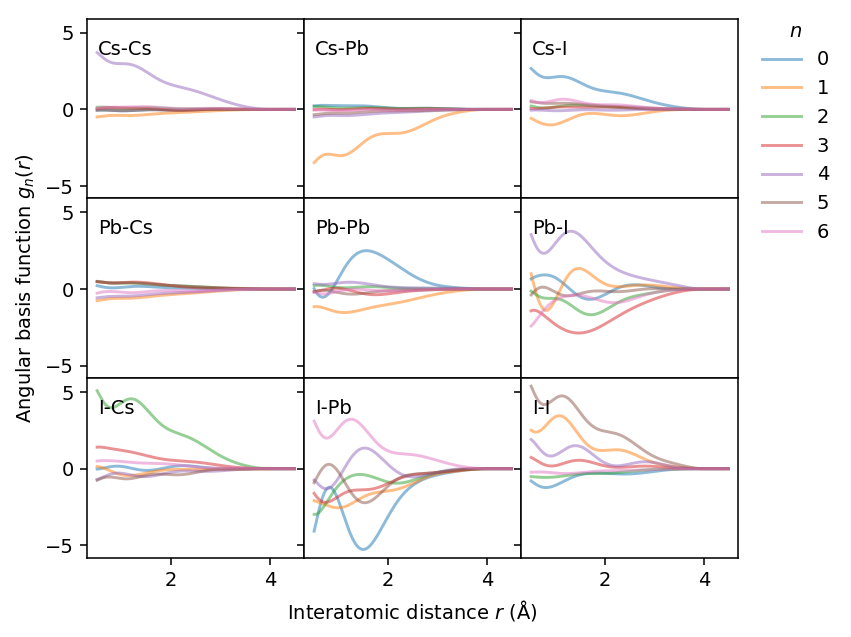

In [8]:
types = model.types
rs = np.arange(0.5, model.angular_cutoff + 0.5, 0.01)
xs = 2 * (rs / model.angular_cutoff - 1) ** 2 - 1

fig, axes = plt.subplots(figsize=(6, 5), nrows=len(types), ncols=len(types),
                         sharex=True, sharey=True, dpi=140)

for (s1, s2), data in model.angular_descriptor_weights.items():
    irow, icol = types.index(s1), types.index(s2)
    ax = axes[irow][icol]

    for n, c_nk in enumerate(data):
        g_n = np.zeros(len(rs))
        for k in range(len(c_nk)):
            coeff = np.zeros((k + 1))
            coeff[-1] = 1
            f_k = 0.5 * (chebval(xs, coeff) + 1) * cutoff_func(rs, model.angular_cutoff)
            g_n += c_nk[k] * f_k
        kwargs = dict(alpha=0.5, label=n)
        ax.plot(rs, g_n, **kwargs)

    if irow == len(axes) - 1 and icol == 1:
        ax.set_xlabel('Interatomic distance $r$ (Å)')
    if irow == 1 and icol == 0:
        ax.set_ylabel('Angular basis function $g_n(r)$')
    ax.text(0.05, 0.8, f'{s1}-{s2}', transform=ax.transAxes)

axes[0][-1].legend(title='$n$', loc='upper right',
                   bbox_to_anchor=(1.5, 1.08), frameon=False)

plt.subplots_adjust(hspace=0.0, wspace=0.0)
fig.align_labels()

## Manipulating a model

The `model` object also enables us to manipulate the model itself.
Note that one should not modify the hyperparameters such as ``n_max``, ``l_max`` and so on as this will lead to inconsistencies in the array dimensions and shapes.
We can, however, modify the neural network (NN) or the descriptor weights.
Let us now demonstrate how the `model` object can be used to test the affect of pruning the neural network.

The NN weights enter the model via Eq. (1) of Fan *et al*., [Journal of Chemical Physics **157**, 114801 (2022)](https://doi.org/10.1063/5.0106617), which specifies the energy of atom $i$ in terms of the descriptor components $q_\nu^i$

$$
U_i
= \sum_{\mu=1}^{N_\text{neu}} w_\mu^{(1)} \tanh \left(
\sum_{\nu=1}^{N_\text{des}} w_{\mu\nu}^{(0)} q_{\nu}^i - b_\mu^{(0)}
\right)
- b^{(1)}.
$$

The $w$ and $b$ parameters in this expression are available via the ``ann_parameters`` member in the form of a dict.
In the present example, we analyze a NEP3 model for which the NN weights are the same for all species.
There are therefore two fields ``all_species`` and ``b1``, where the former contains $w_{\mu\nu}^{(0)}$ (&rarr; ``w0``), $b_{\mu}^{(0)}$ (&rarr; ``b0``), and $w_{\mu}^{(1)}$ (&rarr; ``w1``) while the latter contains the constant offset $b^{(1)}$.
In the present case the descriptor has 37 components and the hidden layer contains 50 neurons, which we readily recognize in the shape of the weight arrays.

In [9]:
for key, value in model.ann_parameters['all_species'].items():
    print(f'{key:6} : {value.shape}')

w0     : (50, 37)
b0     : (50, 1)
w1     : (1, 50)


Let us now plot the distribution of the weights $w_{\mu\nu}^{(0)}$ (``w0``) connecting the descriptor to the hidden layer on a logarithmic scale.

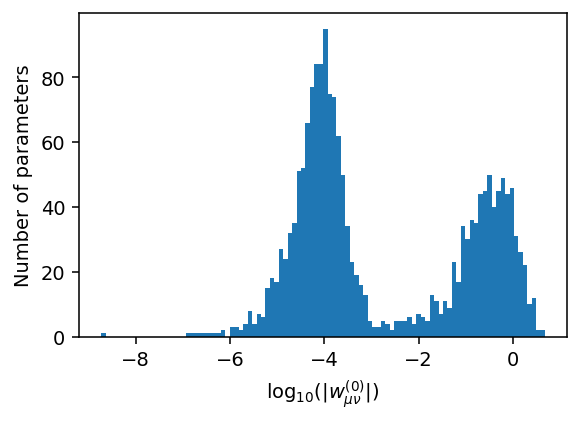

In [10]:
fig, ax = plt.subplots(figsize=(4.5, 3), dpi=140)

params = model.ann_parameters['all_species']['w0'].flatten()
_ = ax.hist(np.log10(np.abs(params)), bins=100)
ax.set_xlabel('log$_{10}$($|w_{\\mu\\nu}^{(0)}|$)')
ax.set_ylabel('Number of parameters')

fig.align_labels()

It is apparent that the majority of parameters are actually rather small with absolute values $\lesssim 10^{-3}$.
This distribution emerges if the optimization is run for sufficiently many generations (typically at least 100,000 generations), and is the result of the $\ell_1$ and $\ell_2$ regularization terms in the NEP loss function, which penalize spurious parameters.

Such a situation can occur, for example, if a particular descriptor component is not well represented by the training set, i.e., the structures in the training set only span a narrow range of values.
As a result, it is difficult for the network to "learn" the impact of this particular descriptor component.
If during application of the model a configuration is encountered that goes beyond this range it can lead to uncontrolled (and often unstable) behavior.
Adding regularization terms combats such behavior.

Let us now remove remove small weights from our model to illustrate that this has (normally) a negligible effect.
From the figure above, we can see that the two peaks in the distribution are separated at about $10^{-3}$.

In [11]:
model_mod = read_model(model_fname)
params = model.ann_parameters['all_species']['w0']
print(f'number of non-zero parameters before pruning: {np.count_nonzero(params)}')
params = np.where(np.log10(np.abs(params)) > -3, params, 0)
print(f'number of non-zero parameters after pruning: {np.count_nonzero(params)}')
model_mod.ann_parameters['all_species']['w0'] = params
model_mod.write('nep-modified.txt')

number of non-zero parameters before pruning: 1850
number of non-zero parameters after pruning: 754


To evaluate the effect of pruning we calculate the energies of five perovskite structures (in practice one should of course consider a much larger set of structures and properties).

In [12]:
data = {}
for conf_fname in sorted(glob('CsPbI3-*.xyz')):
    name = conf_fname.split('/')[-1].replace('.xyz', '')
    if name not in data:
        data[name] = {}
    conf = read(conf_fname)

    conf.calc = CPUNEP(model_fname)
    data[name]['original'] = conf.get_potential_energy() / len(conf)

    conf.calc = CPUNEP('nep-modified.txt')
    data[name]['pruned'] = conf.get_potential_energy() / len(conf)
df = DataFrame.from_dict(data).T
energy_shift = df.pruned.T.loc['CsPbI3-orthorhombic-Pnma']
energy_shift -= df.original.T.loc['CsPbI3-orthorhombic-Pnma']
print('energy orthorhombic structure:')
print(f'  original= {df.original.T.loc["CsPbI3-orthorhombic-Pnma"]:.5f}')
print(f'  pruned=   {df.pruned.T.loc["CsPbI3-orthorhombic-Pnma"]:.5f} eV/atom')
print(f'  shift=    {energy_shift*1e3:.5f} meV/atom')

df.original -= df.original.T.loc['CsPbI3-orthorhombic-Pnma']
df.pruned -= df.pruned.T.loc['CsPbI3-orthorhombic-Pnma']
df.original *= 1e3
df.pruned *= 1e3
df['difference'] = df.pruned - df.original
df

energy orthorhombic structure:
  original= -45.85038
  pruned=   -45.85039 eV/atom
  shift=    -0.01322 meV/atom


original     pruned  difference
CsPbI3-cubic-Pm-3m        20.885170  20.871339   -0.013831
CsPbI3-delta-Pnma        -16.578187 -16.567088    0.011099
CsPbI3-orthorhombic-Pnma   0.000000   0.000000    0.000000
CsPbI3-tetragonal-I4mcm    5.736252   5.731097   -0.005156
CsPbI3-tetragonal-P4mbm    5.402020   5.397237   -0.004783

It is apparent that the energetics are only weakly affected as the total energies only change on the order of $10^{-5}$ eV/atom, and the energy differences between the structures differ by an even smaller amount.

## Peeling the model, layer by layer

The above analysis shows that there are some connections that are effectively turned off during parameter optimization.
Let us now inspect which terms these weights correspond to.
Below we first plot the mean absolute weight per node in the descriptor (input) layer
$$
N_\text{neu}^{-1}\sum_{\mu}^{N_\text{neu}} |w_{\mu\nu}^{(0)}|.
$$

In [13]:
fig, ax = plt.subplots(figsize=(7, 4), dpi=140)

params = model.ann_parameters
nr = model.n_max_radial + 1
na = model.n_max_angular + 1
la = model.l_max_3b + model.l_max_4b + model.l_max_5b

acc_w_desc = np.mean(np.abs(params['all_species']['w0']), axis=0)
for k, w in enumerate(acc_w_desc):
    kwargs = dict()
    label, color = '', 'C0'
    if k < nr:
        if k == 0:
            label = 'radial'
    else:
        color = 'C1'
        if k == nr:
            label = 'angular'
    kwargs = dict(color=color, label=label)
    ax.bar([k], [w], **kwargs)

ax.set_xlabel(r'Descriptor component')
ax.set_ylabel(r'Mean absolute weights')
ax.legend(frameon=False)

labels = [f'{r}' for r in range(nr)]
labels += [f'{n},{l}' for l in range(la) for n in range(na)]
ax.set_xticks(range(len(labels)), labels=labels)
plt.xticks(rotation=90);

It is apparent that the radial components carry a higher overall weight in the description of the interactions than the angular components, as expected based on physical intuition.
One also observes that the mean absolute weights are non-zero for *all* descriptor components.
In other words, all of the descriptor components are active.
This is different for the nodes in the hidden layer as we can see in the next figure, which shows

* the weights connecting the hidden layer to the output node $|w_{\nu}^{(1)}|$,
* the mean absolute weight per node in the hidden layer $N_{\mathrm{des}}^{-1} \sum_{\nu}^{N_{\mathrm{des}}} |w_{\mu\nu}^{(0)}|$ as well as
* the bias for each node in the hidden layer $|b_{\nu}^{(0)}|$.

Approximate number of active neurons: 32


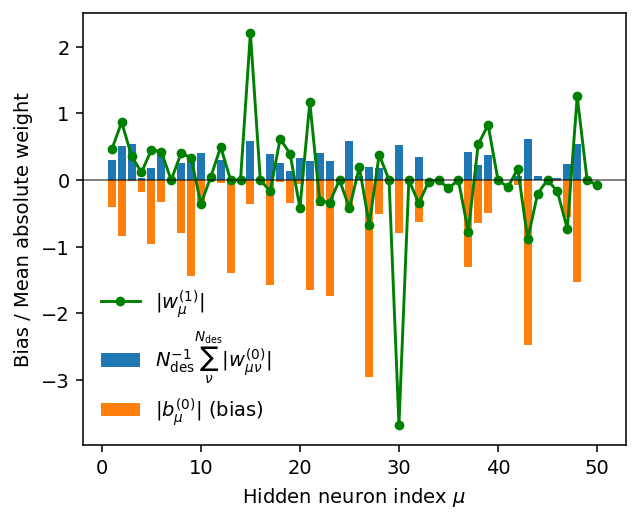

In [14]:
fig, ax = plt.subplots(figsize=(5, 4), dpi=140)

params = model.ann_parameters
w0 = params['all_species']['w0']
w1 = params['all_species']['w1']
b0 = params['all_species']['b0']

xs = range(1, len(b0) + 1)
acc_weights = np.mean(np.abs(w0), axis=1)
ax.bar(xs, acc_weights,
       label=r'$N_{\mathrm{des}}^{-1} \sum_{\nu}^{N_{\mathrm{des}}} |w_{\mu\nu}^{(0)}|$')
abs_b0 = np.abs(b0.flatten())
ax.bar(xs, -np.abs(b0.flatten()), label=r'$|b_{\mu}^{(0)}|$ (bias)')
ax.plot(xs, w1.flatten(), 'o-', label=r'$|w_{\mu}^{(1)}|$', c='green', markersize=4)
ax.axhline(0, lw=1, c='k', alpha=0.5)

ax.set_xlabel(r'Hidden neuron index $\mu$')
ax.set_ylabel(r'Bias / Mean absolute weight')
ax.legend(frameon=False)

print('Approximate number of active neurons:', np.count_nonzero(abs_b0[abs_b0 > 0.01]))

There are several neurons with very small mean absolute weight $N_{\mathrm{des}}^{-1} \sum_{\nu}^{N_{\mathrm{des}}} |w_{\mu\nu}^{(0)}|$, implying that these neurons are effectively inactive.
For the same neurons also the weights for the connections to the output node $|w_{\mu}^{(1)}|$ as well as the bias terms $|b_{\mu}^{(0)}|$ are small.

This suggests that the number of neurons in the hidden layer could be reduced notably without a loss in accuracy, leading to faster execution.